# Import backage

In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from train import train
from train import train_plus
from models.models_new import Renorm_Dynamic
from dynamic_models_sis_new import Simple_Spring_Model
from vector_field import mesh
from vector_field import transit
from datetime import datetime
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [10]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01
interval = 100
steps2 = 10
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10*interval, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt,interval=interval) 
train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps*interval, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt,interval=interval)

# Train

In [ ]:
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 30001
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp, net = train_plus(train_data=train_data, test_data=test_data, 
                                                                         sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                         mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis',steps2=steps2,interval=interval)
torch.save(net.state_dict(), f'mdl_data/nis steps10 exp-0.2t interval100 seed={seed}.mdl')

check point-------o_0-> 18:33:45.134131; lasting 0:15:07.682221 seconds
Epoch: 0
Train loss: 0.2064
dEI: 0.5667
term1: -0.2908
term2: 1.4243
Test multistep loss: 0.4328
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 18:33:51.695448; lasting 0:00:06.561317 seconds
check point-------o_0-> 18:36:08.357082; lasting 0:02:16.661634 seconds
Epoch: 500
Train loss: 0.0291
dEI: 1.0013
term1: 0.6870
term2: 1.3156
Test multistep loss: 0.2077
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 18:36:18.575019; lasting 0:00:10.217937 seconds
check point-------o_0-> 18:38:23.569382; lasting 0:02:04.994363 seconds
Epoch: 1000
Train loss: 0.0175
dEI: 1.2768
term1: 1.2119
term2: 1.3418
Test multistep loss: 0.2125
--------------------------------------------------------------------------------------------------------

In [ ]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01
interval = 100
steps2 = 10

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10*interval, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt,interval=interval) 
train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps*interval, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt,interval=interval)

In [ ]:
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp, net_nisp = train_plus(train_data=train_data, test_data=test_data, 
                                                                         sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                         mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis+',steps2=steps2,interval=interval)
torch.save(net_nisp.state_dict(), f'mdl_data/nisp steps10 exp-0.2t interval100 seed={seed}.mdl')

check point-------o_0-> 20:58:36.398985; lasting 0:02:30.966677 seconds
Epoch: 500
Train loss: 0.0285
dEI: 1.0071
term1: 0.7017
term2: 1.3124
Test multistep loss: 0.2085
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 20:58:45.791620; lasting 0:00:09.392635 seconds
check point-------w_0-> 21:01:19.009482; lasting 0:02:33.217862 seconds
check point-------w_1-> 21:01:19.027645; lasting 0:00:00.018163 seconds
check point-------w_2-> 21:05:56.118042; lasting 0:04:37.090397 seconds
check point-------w_3-> 21:05:56.121555; lasting 0:00:00.003513 seconds
check point-------o_0-> 21:05:56.169609; lasting 0:00:00.048054 seconds
Epoch: 1000
Train loss: 0.0176
dEI: 1.2789
term1: 1.2201
term2: 1.3376
Test multistep loss: 0.2137
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 21:06:05.164604; lasting 0:00:08.

# Plot

/home/yuanbing/data/test/ymz_nis/Code-for-Finding-emergence-in-data-/exp/sir/vector_field.py:94: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025831440/work/torch/csrc/utils/tensor_new.cpp:275.)
  dSdt=torch.tensor([dSdt],device=device,dtype=torch.float).t()
/home/yuanbing/data/test/ymz_nis/Code-for-Finding-emergence-in-data-/exp/sir/vector_field.py:76: RuntimeWarning: invalid value encountered in scalar divide
  count_mean[i,j,0]=np.sum(x_m)/np.sum(count[i,j,:,:].cpu().detach().numpy())
/home/yuanbing/data/test/ymz_nis/Code-for-Finding-emergence-in-data-/exp/sir/vector_field.py:77: RuntimeWarning: invalid value encountered in scalar divide
  count_mean[i,j,1]=np.sum(y_m)/np.sum(count[i,j,:,:].cpu().detach().numpy())


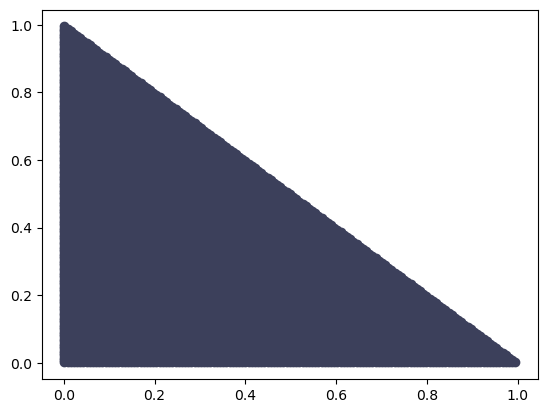

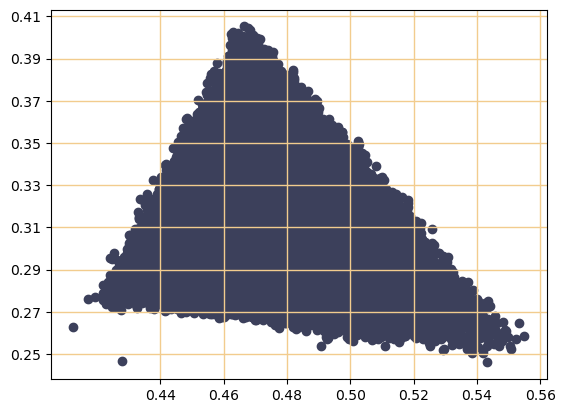

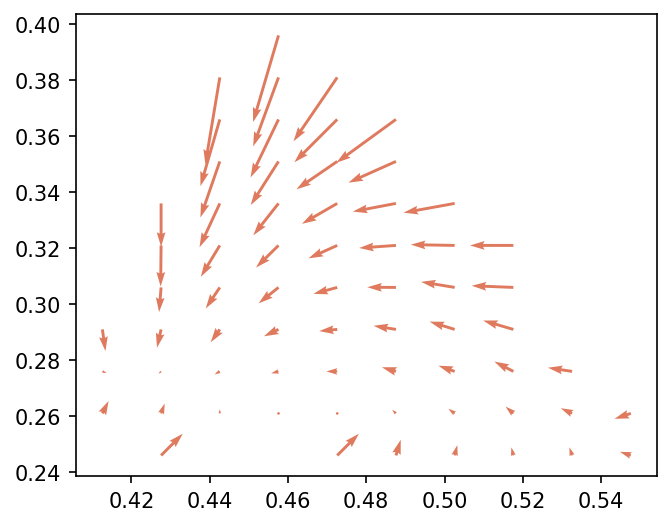

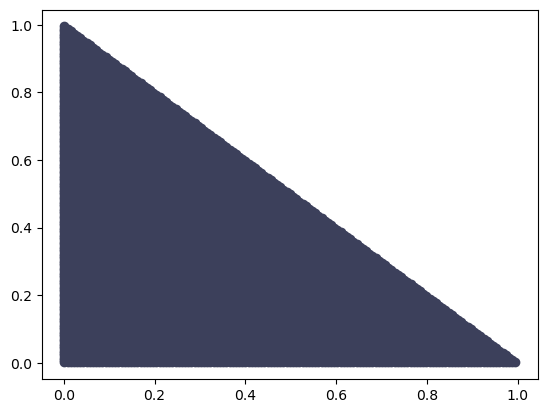

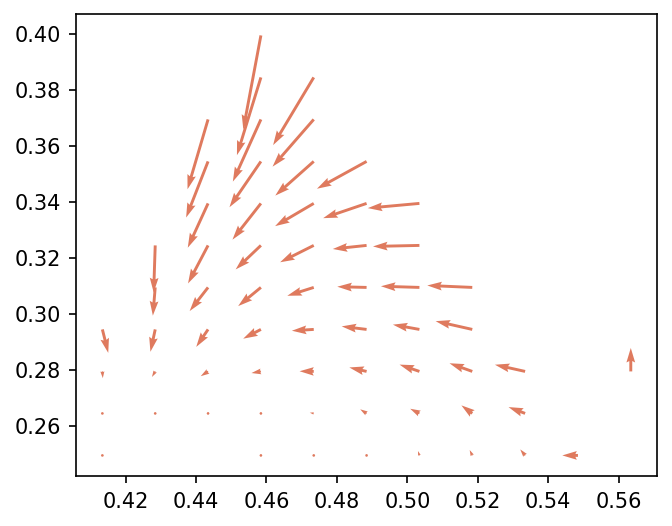

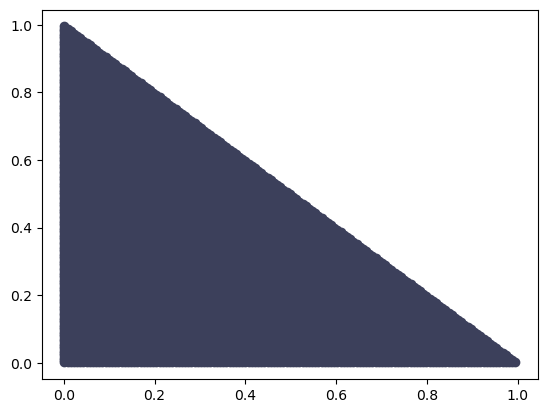

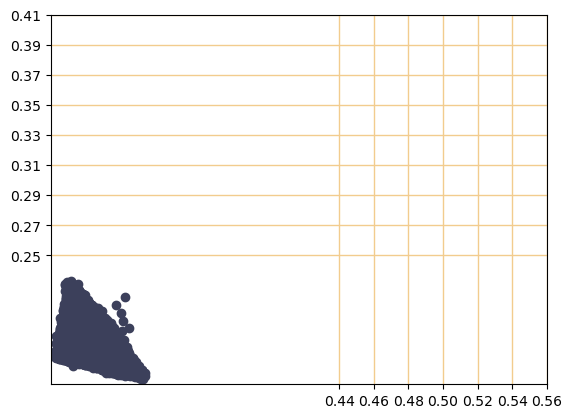

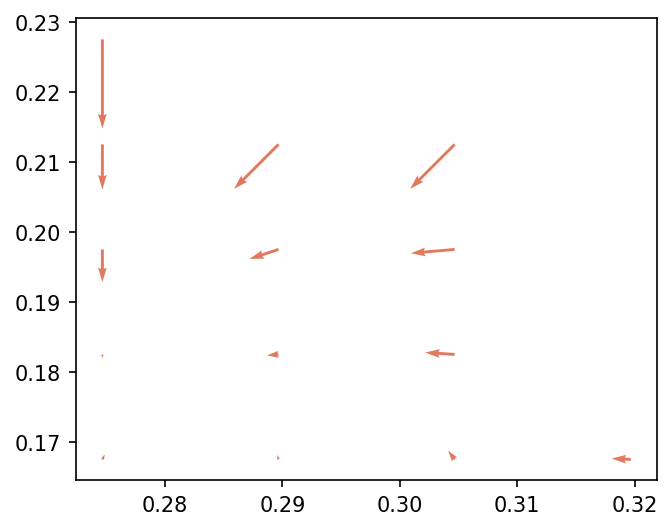

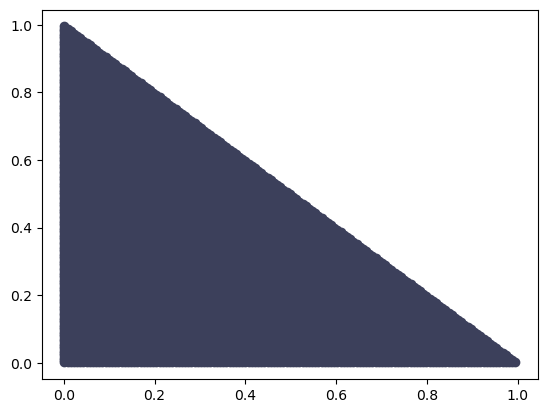

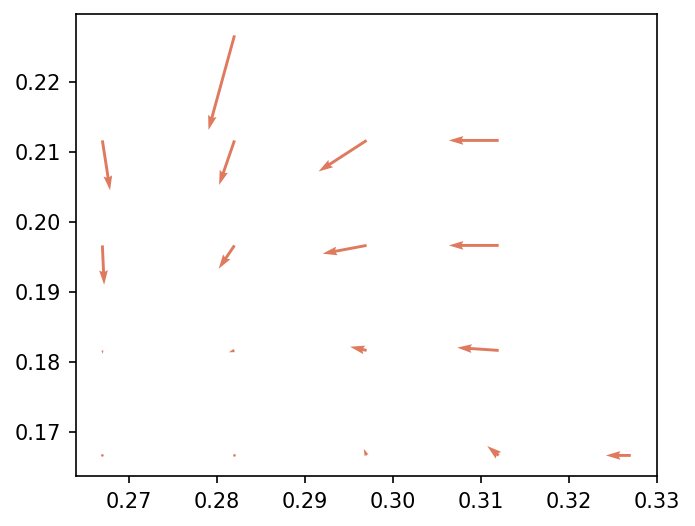

In [7]:
from vector_field import vector_func
sz = 4
scale = 2
L = 1
sigma = 0.03
rou = -0.5
hidden_units = 64
nis = Renorm_Dynamic(sym_size = sz, latent_size = scale, effect_size = sz, 
                         hidden_units = hidden_units, normalized_state=True, device = device)
nisp = Renorm_Dynamic(sym_size = sz, latent_size = scale, effect_size = sz, 
                         hidden_units = hidden_units, normalized_state=True, device = device)
nis.to(device=device)
nisp.to(device=device)
nis.load_state_dict(torch.load(f'mdl_data/nis steps10 exp-0.2t interval100 seed={seed}.mdl'))
nisp.load_state_dict(torch.load(f'mdl_data/nisp steps10 exp-0.2t interval100 seed={seed}.mdl'))



dd1_nis,dd2_nis=vector_func(nis,sigma=sigma,rou=rou, jac_bool=False, density=0.007,density2=0.015,density3=0.07)
dd1_nis_jac,dd2_nis_jac=vector_func(nis,sigma=sigma,rou=rou, jac_bool=True,density=0.007,density2=0.015,density3=0.07)
dd1_nisp,dd2_nisp=vector_func(nisp,sigma=sigma,rou=rou, jac_bool=False,density=0.007,density2=0.015,density3=0.07)
dd1_nisp_jac,dd2_nisp_jac=vector_func(nisp,sigma=sigma,rou=rou, jac_bool=True,density=0.007,density2=0.015,density3=0.07)

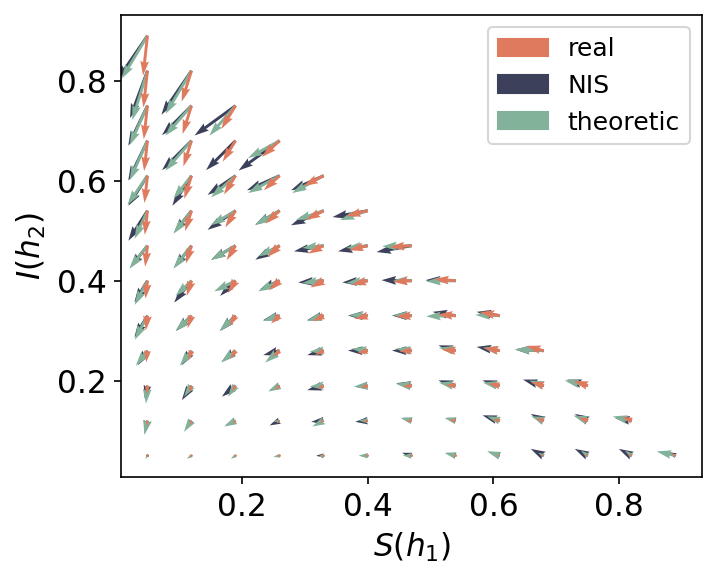

In [8]:
import matplotlib
def SIR(s,i,lam=1,miu=0.5):
    ds=-lam * s * i
    di=lam * s * i - miu * i
    return ds, di
S, I = mesh(0.07)
dSdt,dIdt = SIR(S,I)
m=0.1
dSdt,dIdt=m*dSdt,m*dIdt
fig,ax = plt.subplots(figsize=(5,4),dpi=150)
colorlabel = ['#F4F1DE','#DF7A5E','#3C405B','#82B29A','#F2CC8E']
colors=[colorlabel[2]]*len(S)+[colorlabel[3]]*len(S)+[colorlabel[1]]*len(S)
S=list(S)+list(S)+list(S)
I=list(I)+list(I)+list(I)
dd1_final=list(dd1_nis)+list(dd1_nis_jac)+list(dSdt)
dd2_final=list(dd2_nis)+list(dd2_nis_jac)+list(dIdt)

quiver = ax.quiver(S, I, dd1_final, dd2_final, width=0.005,color=colors)
red_patch = matplotlib.patches.Patch(color=colorlabel[1], label='real')
green_patch = matplotlib.patches.Patch(color=colorlabel[2], label='NIS')
ran_patch = matplotlib.patches.Patch(color=colorlabel[3], label='theoretic')
plt.legend(handles=[red_patch, green_patch,ran_patch],loc='best', fontsize=12)

# Set graphic title and axis labels.
plt.xlabel('$S(h_1)$',fontsize=15)
plt.ylabel('$I(h_2)$',fontsize=15)

ax.tick_params(labelsize=15)
plt.show()

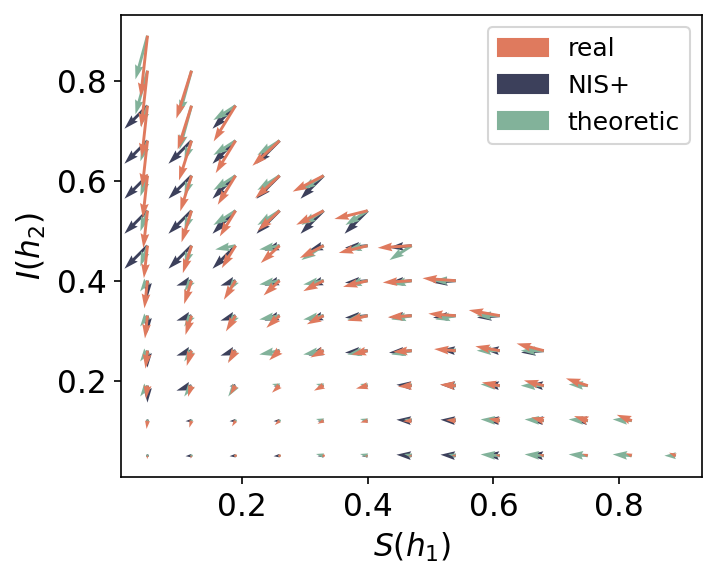

In [9]:
def SIR(s,i,lam=1,miu=0.5):
    ds=-lam * s * i
    di=lam * s * i - miu * i
    return ds, di
S, I = mesh(0.07)
dSdt,dIdt = SIR(S,I)
m=0.1
dSdt,dIdt=m*dSdt,m*dIdt
fig,ax = plt.subplots(figsize=(5,4),dpi=150)
colorlabel = ['#F4F1DE','#DF7A5E','#3C405B','#82B29A','#F2CC8E']
colors=[colorlabel[2]]*len(S)+[colorlabel[3]]*len(S)+[colorlabel[1]]*len(S)
S=list(S)+list(S)+list(S)
I=list(I)+list(I)+list(I)
dd1_final=list(dd1_nisp)+list(dd1_nisp_jac)+list(dSdt)
dd2_final=list(dd2_nisp)+list(dd2_nisp_jac)+list(dIdt)

quiver = ax.quiver(S, I, dd1_final, dd2_final, width=0.005,color=colors)
red_patch = matplotlib.patches.Patch(color=colorlabel[1], label='real')
green_patch = matplotlib.patches.Patch(color=colorlabel[2], label='NIS+')
ran_patch = matplotlib.patches.Patch(color=colorlabel[3], label='theoretic')
plt.legend(handles=[red_patch, green_patch,ran_patch],loc='best', fontsize=12)

# Set graphic title and axis labels.
plt.xlabel('$S(h_1)$',fontsize=15)
plt.ylabel('$I(h_2)$',fontsize=15)

ax.tick_params(labelsize=15)
plt.show()